# Итоговая работа.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [4]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [178]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b ) 
    
    return np.dot( a, b ) / ( aLength * bLength )

In [200]:
for i in range(len(ratings)):
    arr = np.apply_along_axis(cosine, 1, ratings, ratings[i])
    most_similar = np.argmax(
        np.where(abs(arr - 1) < 1e-6, 0, arr)) # исключаем сходство пользователя с самим собой
    print(i, most_similar)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

С помощью метода главных компонент (PCA, Principal Component Analysis). Это метод понижения размерности данных с потерей информации.

In [1]:
from sklearn import decomposition

In [10]:
pca = decomposition.PCA(n_components=5)
pca.fit(ratings)
ratings_t = pca.transform(ratings)
print('Исходная размерность: {}'.format(ratings.shape))
print('Уменьшенная размерность: {}'.format(ratings_t.shape))

Исходная размерность: (10, 15)
Уменьшенная размерность: (10, 5)


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [11]:
import math
from scipy.misc import derivative

In [12]:
def f(x):
    return (math.tan(math.sin(x) + math.cos(2*x+3)))**2

print(derivative(f, 1.0, dx=1e-6, n=1))

55.3859176464222


$f'(x) = tg^2(sin(x) + cos(2x+3))' = 2tg(sin(x)+cos(2x+3))\cdot tg(sin(x)+cos(2x+3))' = $ <br>
$= 2tg(sin(x)+cos(2x+3))\cdot \frac{1}{cos^2(sin(x)+cos(2x+3)} \cdot (sin(x)+cos(2x+3))' = $ <br>
$= 2tg(sin(x)+cos(2x+3))\cdot \frac{1}{cos^2(sin(x)+cos(2x+3)} \cdot (cos(x)-2sin(2x+3)) $ <br>
$f'(1) = 2tg(sin(1)+cos(5)) \cdot \frac{1}{cos^2(sin(1)+cos(5)} \cdot (cos(1)-2sin(5))$

In [17]:
2*math.tan(math.sin(1) + math.cos(5))*(1/(math.cos(math.sin(1)+math.cos(5)))**2)*(math.cos(1)-2*math.sin(5))

55.385917635337854

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [ ]:
import scipy.optimize as optimize

In [58]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [19]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [20]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [59]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [213]:
ig = [0., 0.]
result = optimize.minimize(error, ig, method = 'COBYLA', options = {'disp' :True})
result.x

array([ 3.00018796, -2.50008926])

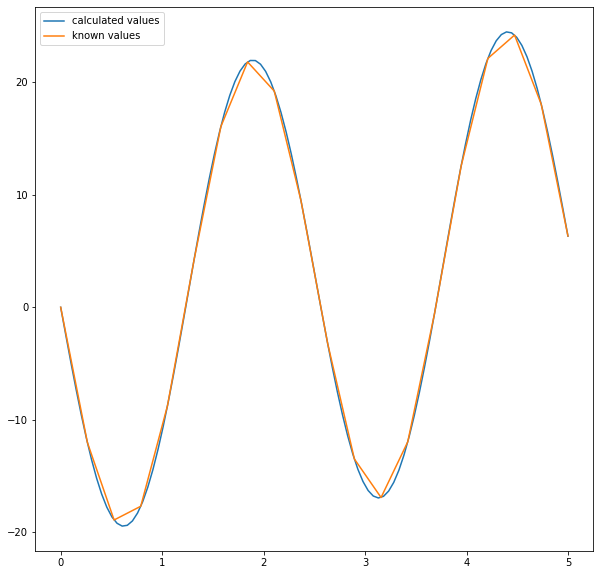

In [212]:
x_n = np.linspace(0, 5, 100)
y_n = f(x_n, result.x[0], result.x[1])
plt.figure(figsize=(10,10))
plt.plot(x_n, y_n, label='calculated values') # вычисленные значения после нахождения параметров
plt.plot(x, fx, label='known values')         # исходные значения функции
plt.legend(loc="upper left")
plt.show()

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [142]:
import scipy.stats as stats

(array([  2.,   5.,   7.,  14.,  27.,  56.,  58.,  79., 124., 126., 129.,
        115.,  85.,  69.,  49.,  27.,  13.,   8.,   5.,   2.]),
 array([1.77182162, 1.7943116 , 1.81680157, 1.83929155, 1.86178153,
        1.8842715 , 1.90676148, 1.92925146, 1.95174143, 1.97423141,
        1.99672139, 2.01921137, 2.04170134, 2.06419132, 2.0866813 ,
        2.10917127, 2.13166125, 2.15415123, 2.1766412 , 2.19913118,
        2.22162116]),
 <BarContainer object of 20 artists>)

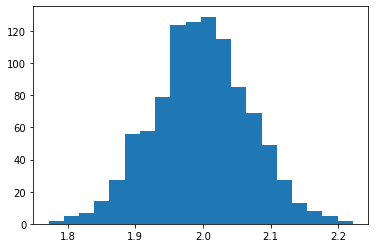

In [170]:
rv = stats.norm(loc=2, scale=0.5)
sample = rv.rvs(size=20)

samples_count = 1000
sample_size = 50
a = np.array([])
for number in range(samples_count):
    sample = rv.rvs(size=sample_size)  # делаем выборку
    a = np.append(a, sample.mean())    # добавляем её среднее в массив
plt.hist(a, bins=20)

Видим, что распределение средних стремится к нормальному, а его мат. ожидание равно мат. ожиданию исходной случайной величины.

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [177]:
m = np.array([[1, 4],
              [1, 1]])
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print(str(w[i]))
    print(str(v[:,i]))

3.0000000000000004
[0.89442719 0.4472136 ]
-0.9999999999999996
[-0.89442719  0.4472136 ]


### Нахождение собственных векторов вручную

Записываем характеристическое уравнение матрицы. Его корни будут являться собственными числами.

$\left| \begin{array}{cc} 1-\lambda & 4 \\ 1 & 1-\lambda \end{array} \right| = 0$ (1)

$(1-\lambda)(1-\lambda) - 4\cdot 1 = 0$ <br>
$\lambda^2 -2\lambda-3=0$ <br>
$\lambda_{1, 2} = \frac {2 \pm \sqrt{2^2-4\cdot 3 \cdot 1}}{2 \cdot 1} = -1, 3$

Найдём собственный вектор для $\lambda_1 = -1$. Составим однородную систему уравнений, подставляя $\lambda$ в характеристическое уравнение (1):

$ \begin{cases} 2x + 4y \\ x + 2y \end{cases} = 0$

Отсюда следует $x = -2y$. Мы можем взять любой вектор, координаты которого будут удовлетворять данному условию. Python в методе linalg.eim взял вектор $\begin{pmatrix} -0.9 \\ 0.45 \end{pmatrix}$. Мы возьмём вектор $ \begin{pmatrix} 2 \\ -1 \end{pmatrix}$

Аналогично для $\lambda_2 = 3$:

$ \begin{cases} -2x + 4y \\ x - 2y \end{cases} = 0$

Отсюда следует $x = 2y$. Python для этого с. ч. взял вектор $\begin{pmatrix} 0.9 \\ 0.45 \end{pmatrix}$. Мы возьмём вектор $ \begin{pmatrix} 2 \\ 1 \end{pmatrix}$

Ответ: с. ч. $\lambda_{1, 2} = -1, 3$. С. в. $ \begin{pmatrix} 2 \\ -1 \end{pmatrix}$, $ \begin{pmatrix} 2 \\ 1 \end{pmatrix}$